In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
# Convert text in experience column to numbers

In [75]:
# Load the data
df = pd.read_csv('hiring.csv')

In [76]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,2,8,9,50000
1,3,8,6,65000
2,5,6,7,80000
3,6,10,10,85000
4,7,9,6,70000
5,9,7,10,162000
6,10,8,7,222000
7,8,7,8,150000


In [77]:
# Data Preprocessing
df.experience.fillna('zero', inplace=True)

C:\Users\anwar\AppData\Local\Temp\ipykernel_16196\3679320718.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.experience.fillna('zero', inplace=True)


In [78]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,2,8,9,50000
1,3,8,6,65000
2,5,6,7,80000
3,6,10,10,85000
4,7,9,6,70000
5,9,7,10,162000
6,10,8,7,222000
7,8,7,8,150000


In [79]:
df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].mean(), inplace=True)
print(df)

   experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0           2                      8                           9      50000
1           3                      8                           6      65000
2           5                      6                           7      80000
3           6                     10                          10      85000
4           7                      9                           6      70000
5           9                      7                          10     162000
6          10                      8                           7     222000
7           8                      7                           8     150000


C:\Users\anwar\AppData\Local\Temp\ipykernel_16196\1111767170.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].mean(), inplace=True)


In [80]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,2,8,9,50000
1,3,8,6,65000
2,5,6,7,80000
3,6,10,10,85000
4,7,9,6,70000
5,9,7,10,162000
6,10,8,7,222000
7,8,7,8,150000


In [81]:
# df.experience = df.experience.apply(w2n.word_to_num)

In [82]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,2,8,9,50000
1,3,8,6,65000
2,5,6,7,80000
3,6,10,10,85000
4,7,9,6,70000
5,9,7,10,162000
6,10,8,7,222000
7,8,7,8,150000


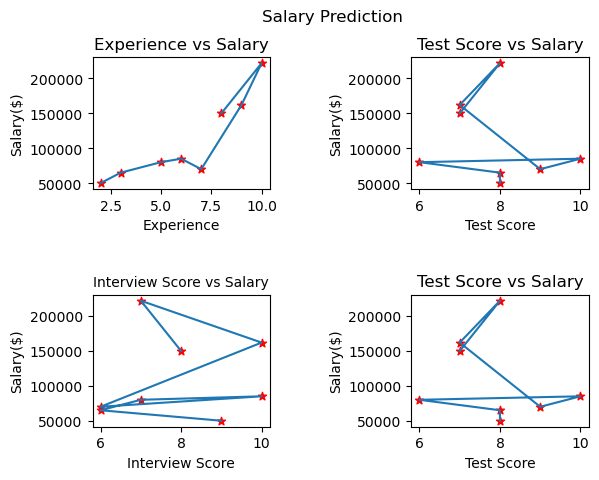

In [83]:

# Create a figure and a 2 x 2 grid of subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Salary Prediction')
#first plot
ax1.plot(df['experience'],df['salary($)'])
ax1.set_title('Experience vs Salary')
ax1.set_xlabel('Experience',)
ax1.set_ylabel('Salary($)' )
ax1.scatter(df['experience'], df['salary($)'], color='red', marker='*', )

#second plot
ax2.plot(df['test_score(out of 10)'],df['salary($)'])
ax2.set_title('Test Score vs Salary')
ax2.set_xlabel('Test Score')
ax2.set_ylabel('Salary($)')
ax2.scatter(df['test_score(out of 10)'], df['salary($)'], color='red', marker='*')

#third plot
ax3.plot(df['interview_score(out of 10)'],df['salary($)'])
ax3.set_title('Interview Score vs Salary', fontsize=10)
ax3.set_xlabel('Interview Score')
ax3.set_ylabel('Salary($)')
ax3.scatter(df['interview_score(out of 10)'], df['salary($)'], color='red', marker='*')

#fourth plot
ax4.plot(df['test_score(out of 10)'],df['salary($)'])
ax4.set_title('Test Score vs Salary')
ax4.set_xlabel('Test Score')
ax4.set_ylabel('Salary($)')
ax4.scatter(df['test_score(out of 10)'], df['salary($)'], color='red', marker='*')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.8, hspace=0.8)

plt.show()

In [84]:
# create the model
Model = linear_model.LinearRegression()
Model.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']], df['salary($)'])

LinearRegression()

In [89]:
Model.predict([[2,9,6]])

C:\Users\anwar\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([18467.48082931])

In [86]:
Model.predict([[12,10,10]])

C:\Users\anwar\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([203003.97614314])

In [87]:
# Model accuracy
Model.score(df[['experience','test_score(out of 10)','interview_score(out of 10)']], df['salary($)'])

0.8043570337402283